<a href="https://colab.research.google.com/github/AlexeyTri/MLSeminars/blob/main/MLHSE/seminar_7_BVD_Bagging_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Семинар 7. BVD-decomposition, Bagging, Boosting**

# План:
Разложение ошибки

Бэггинг и бустинг

    задачи
    код

Feature Importance

Синтетический пример

In [1]:
import sklearn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression 

In [3]:
N = 10
X = np.linspace(-5, 5, N).reshape(-1, 1)
y = np.sin(X) + np.random.normal(0, 0.2, size=N).reshape(-1,1)

In [4]:
too_sample_model_prediction = np.mean(y) * np.ones_like(y)

In [5]:
X_ok = np.hstack([X, X**2, X**3])
ok_model = LinearRegression()
ok_model.fit(X_ok, y)
ok_model_predict = ok_model.predict(X_ok)

In [6]:
X_hard = np.hstack([X,X**2, X**3, X**4, X**5, X**6, X**7, X**8, X**9,X**10])
hard_model = LinearRegression()
hard_model.fit(X_hard, y)
hard_model_predict = hard_model.predict(X_hard)

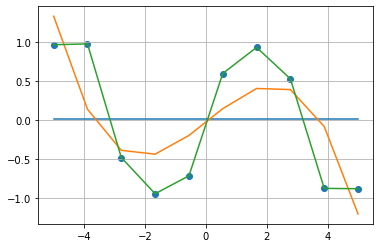

In [7]:
plt.scatter(X, y)
plt.plot(X, too_sample_model_prediction, label='очень хорошая модель')
plt.plot(X, ok_model_predict, label='очень хорошая модель')
plt.plot(X, hard_model_predict, label='очень переобученная модель')
plt.grid()
plt.show()

In [8]:
!pip install --upgrade mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.2 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [9]:
from sklearn.model_selection import train_test_split
from mlxtend.data import boston_housing_data

X, y = boston_housing_data()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, shuffle=True)

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

dtr = DecisionTreeRegressor(random_state=123)
dtr.fit(X_train, y_train)

f'test error: {mean_squared_error(y_test, dtr.predict(X_test))}'
# f'train error: {mean_squared_error(y_train, dtr.predict(X_train))}'

'test error: 20.107368421052637'

In [14]:
from mlxtend.evaluate import bias_variance_decomp

_, avg_b, avg_var = bias_variance_decomp(dtr, X_train, y_train, X_test, y_test, loss="mse", random_seed=123)

In [15]:
avg_b

14.095801179276307

In [16]:
avg_var

17.440207702302633

In [19]:
from sklearn.ensemble import BaggingRegressor

# dtr_new = DecisionTreeRegressor(random_seed=123)
bag_reg = BaggingRegressor(dtr, n_estimators=20, random_state=123)

_, avg_b_b, avg_var_b = bias_variance_decomp(bag_reg, X_train, y_train, X_test, y_test, loss='mse', random_seed=123)

In [20]:
avg_b_b

15.698786665242594

In [21]:
avg_var_b

3.82613624676398

In [22]:
print(f'test error: {mean_squared_error(y_test, bag_reg.predict(X_test))}')
print(f'train error: {mean_squared_error(y_train, bag_reg.predict(X_train))}')

test error: 16.83000312499999
train error: 3.9211391949152534


In [23]:
from sklearn.ensemble import RandomForestRegressor

rfg = RandomForestRegressor(n_estimators=20, random_state=123)

_, avg_b_rfg, avg_var_rfg = bias_variance_decomp(rfg, X_train, y_train, X_test, y_test, loss='mse', random_seed=123)

print(f'test error: {mean_squared_error(y_test, rfg.predict(X_test))}')
print(f'train error: {mean_squared_error(y_train, rfg.predict(X_train))}')

test error: 15.972788486842097
train error: 4.073119209039547


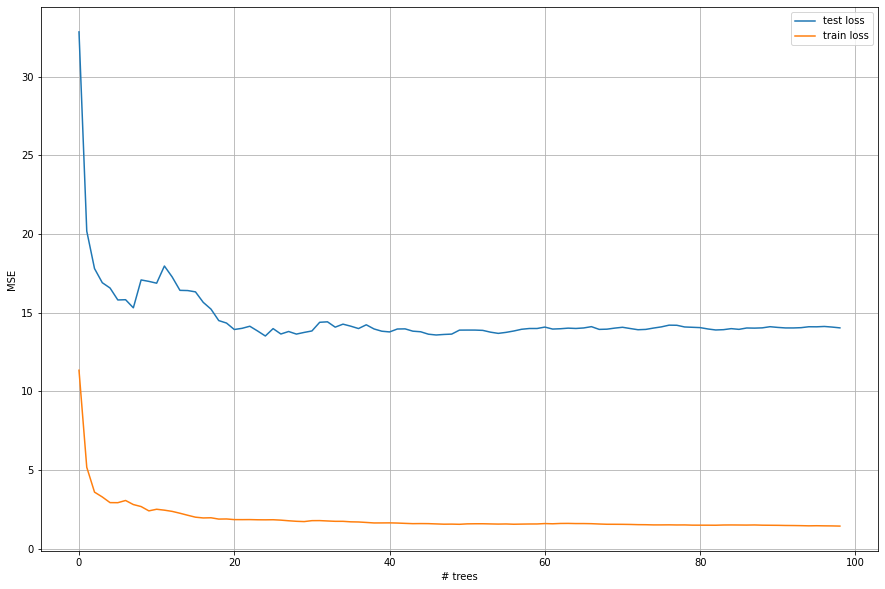

In [26]:
num_trees = 100
test_loss = []
train_loss = []

for i in range(1, num_trees):
    rdm_forest = RandomForestRegressor(n_estimators=i, random_state=123)
    rdm_forest.fit(X_train, y_train)
    test_loss.append(mean_squared_error(y_test, rdm_forest.predict(X_test)))
    train_loss.append(mean_squared_error(y_train, rdm_forest.predict(X_train)))

plt.figure(figsize=(15,10))
plt.grid()
plt.plot(test_loss, label='test loss')
plt.plot(train_loss, label='train loss')
plt.xlabel('# trees')
plt.ylabel('MSE')
plt.legend()
plt.show()

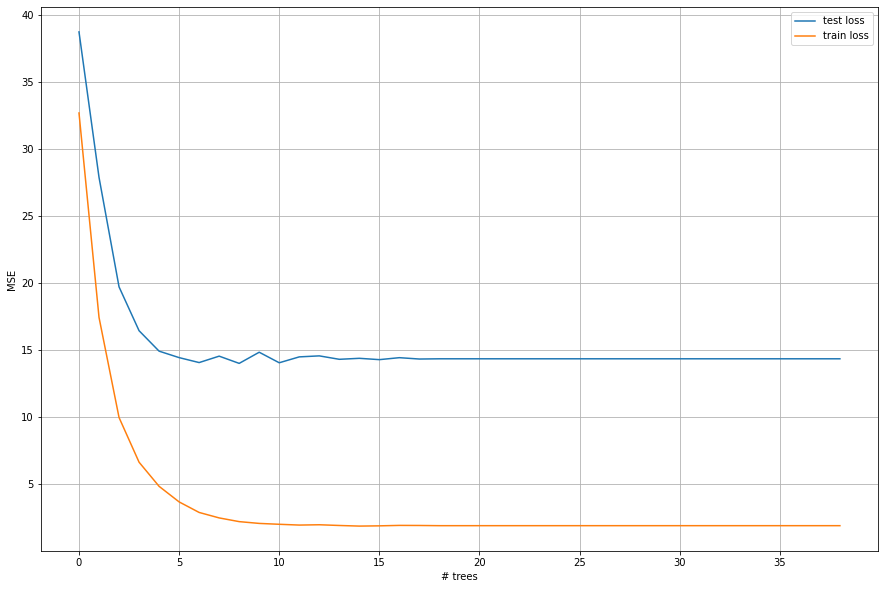

In [27]:
max_deth = 40
test_loss = []
train_loss = []

for i in range(1, max_deth):
    rdm_deth = RandomForestRegressor(n_estimators=20, max_depth=i, random_state=123)
    rdm_deth.fit(X_train, y_train)
    test_loss.append(mean_squared_error(y_test, rdm_deth.predict(X_test)))
    train_loss.append(mean_squared_error(y_train, rdm_deth.predict(X_train)))
plt.figure(figsize=(15,10))
plt.grid()
plt.plot(test_loss, label='test loss')
plt.plot(train_loss, label='train loss')
plt.xlabel('# trees')
plt.ylabel('MSE')
plt.legend()
plt.show()

Усреднённая ошибка на неотобранных образцах по всему случайному лесу называется out-of-bag-ошибкой.

НА НЕОТРАБОТАННЫХ ОБРАЗЦАХ ТРЕйНА!


oob_score = True

In [29]:
rdm_oob = RandomForestRegressor(n_estimators=20, random_state=123, oob_score=True)
rdm_oob.fit(X,y)
rdm_oob.oob_score_

0.858785979285376

In [41]:
rdm_oob.feature_importances_

array([0.03122725, 0.00123824, 0.00602431, 0.00107255, 0.02089908,
       0.47340343, 0.01205852, 0.06189619, 0.00532502, 0.01723235,
       0.0146189 , 0.01102187, 0.34398228])

In [ ]:
from sklearn.datasets import load_boston

data = load_boston()
# X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.3, random_state=123)
# rdm_oob.fit(X_tr, y_tr)

<BarContainer object of 13 artists>

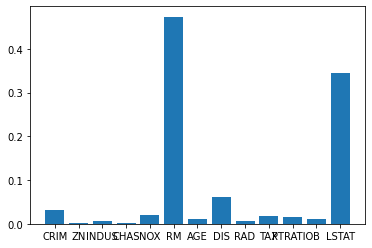

In [42]:
plt.figure()
plt.bar(data['feature_names'], rdm_oob.feature_importances_)

In [46]:
RM_mc = (X_train[:,5]*2 + 3).reshape(-1,1)
X_train_new = np.hstack((X_train, RM_mc))

rdm_oob.fit(X_train_new, y_train)

RandomForestRegressor(n_estimators=20, oob_score=True, random_state=123)

In [47]:
names = list(data['feature_names']).append('RM_mc')

<BarContainer object of 14 artists>

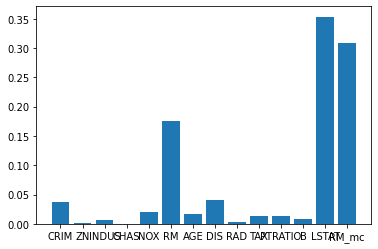

In [58]:
plt.bar(names, rdm_oob.feature_importances_)

In [ ]:
import torchvision
fmnist = torchvision.datasets.FashionMNIST('./', download=True)

In [64]:
X = fmnist.data.numpy().reshape(-1,28*28)
y = fmnist.targets.numpy()

In [69]:
fmnist.data.numpy().reshape(-1, 28*28).shape

(60000, 784)

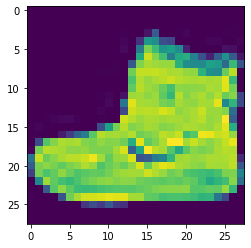

In [71]:
plt.imshow(X[0, :].reshape(28,28))

In [72]:
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.3, random_state=123)


In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

rfr = RandomForestRegressor()
knn = KNeighborsClassifier()

rfr.fit(X_tr, y_tr)
knn.fit(X_ts, y_ts)

KNeighborsClassifier()

In [78]:
from sklearn.metrics import accuracy_score

In [83]:
print(np.mean(y_ts == rfr.predict(X_ts)))
print(np.mean(y_ts == knn.predict(X_ts)))

0.25244444444444447
0.8799444444444444
